In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df_federal = pd.read_csv('Federal_Mininum_Wage_Rate.csv')
df_federal = df_federal.rename(columns={'STTMINWGFG': 'values_federal'})
df_federal = df_federal.rename(columns={'observation_date': 'years'})

In [90]:
df_california = pd.read_csv('California_Mininum_Wage_Rate.csv')
df_california = df_california.rename(columns={'STTMINWGCA': 'values_california'})
df_california = df_california.rename(columns={'observation_date': 'years'})

In [91]:
df_joint = pd.merge(df_federal, df_california)

In [92]:
df_melt = df_joint.melt(
    id_vars='years',
    value_vars=['values_federal', 'values_california'],
    var_name='types'
).reset_index(drop=True)

df_melt['types'] = df_melt['types'].replace('values_federal', 'federal')
df_melt['types'] = df_melt['types'].replace('values_california', 'california')

In [93]:
years = range(1968, 2026)

def get_dates():
    return [f'{i}-01-01' for i in years]

mapping = dict(zip(get_dates(), years))

In [94]:
filter_federal = df_melt['types'] == 'federal'
df_filtered_federal = df_melt[filter_federal]
df_filtered_federal['years'] = df_filtered_federal['years'].map(mapping)
df_filtered_federal = df_filtered_federal.reset_index(drop=True)

C:\Users\lazar\AppData\Local\Temp\ipykernel_5216\1320860325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_federal['years'] = df_filtered_federal['years'].map(mapping)


In [95]:
filter_california = df_melt['types'] == 'california'
df_filtered_california = df_melt[filter_california]
df_filtered_california['years'] = df_filtered_california['years'].map(mapping)
df_filtered_california = df_filtered_california.reset_index(drop=True)

C:\Users\lazar\AppData\Local\Temp\ipykernel_5216\3535667351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_california['years'] = df_filtered_california['years'].map(mapping)


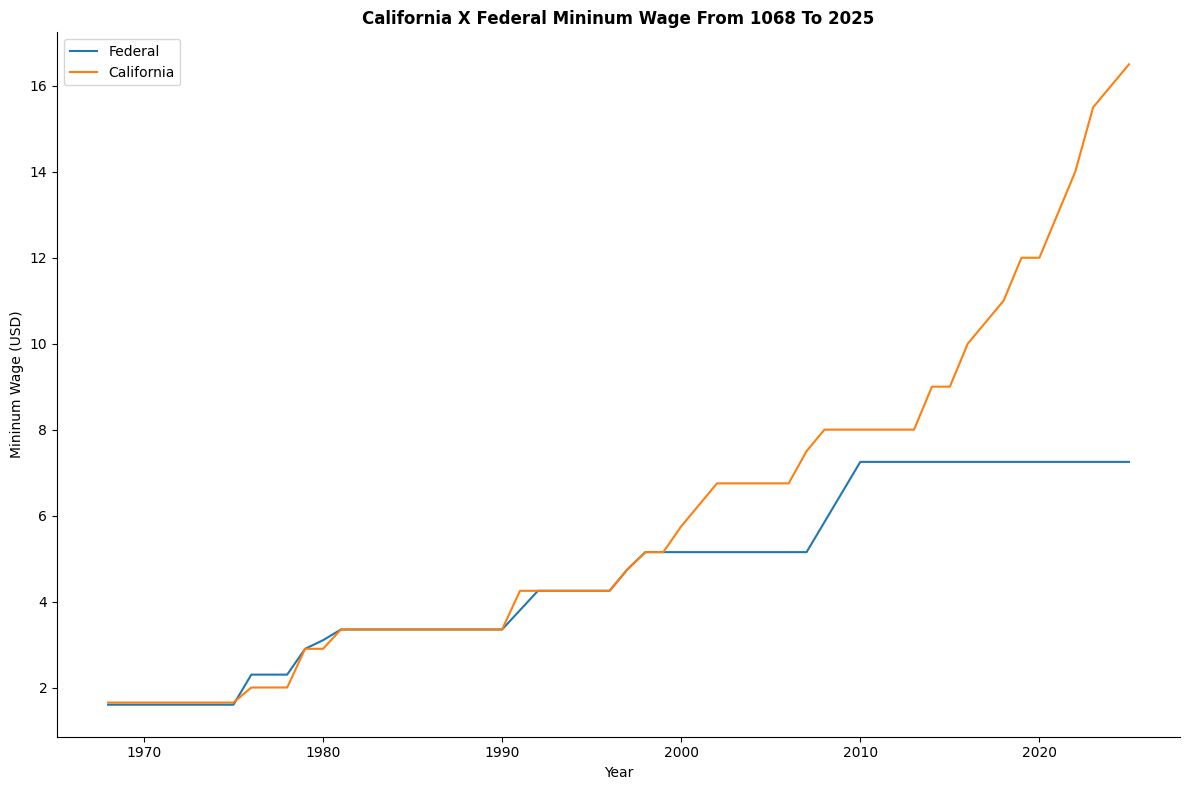

In [96]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_filtered_federal, x='years', y='value', label='Federal')
sns.lineplot(data=df_filtered_california, x='years', y='value', label='California')

ax.set_ylabel('Mininum Wage (USD)')
ax.set_xlabel('Year')
ax.set_title('California X Federal Mininum Wage From 1068 To 2025', fontweight='bold')
sns.despine()

plt.tight_layout()
plt.show()